In [27]:
# Importando Bibliotecas de Análise de Dados:

import pandas as pd
import matplotlib.pyplot as plt

In [28]:
# Importando arquivo csv do desafio usando método do pandas:

df = pd.read_csv('/content/dados_desafio_fabrica.csv')
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [29]:
# Vendo a descrição e as informações do Dataframe:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [30]:
# Calculando os valores mínimos, máximos e médios de pontuação de cada matéria (matemática, leitura e escrita);

materias = df.describe()

max = materias.loc['max']
min = materias.loc['min']
media = materias.loc['mean']

# Pegando os cálculos e colocando em um novo Dataframe;
resultados = pd.DataFrame({'Máximo': max, 'Mínimo': min, 'Média': media})

# Exibindo os resultados do Dataframe novo;
print("Valores estatísticos das matérias:")
display(resultados)


Valores estatísticos das matérias:


,Máximo,Mínimo,Média
math score,100.0,0.0,66.089
reading score,100.0,17.0,69.169
writing score,100.0,10.0,68.054


- Com uma rápida análise dos dados acima, percebemos que matemática possui o menor valor mínimo e a menor média, demonstrando ser uma dificuldade maior dos alunos como um todo

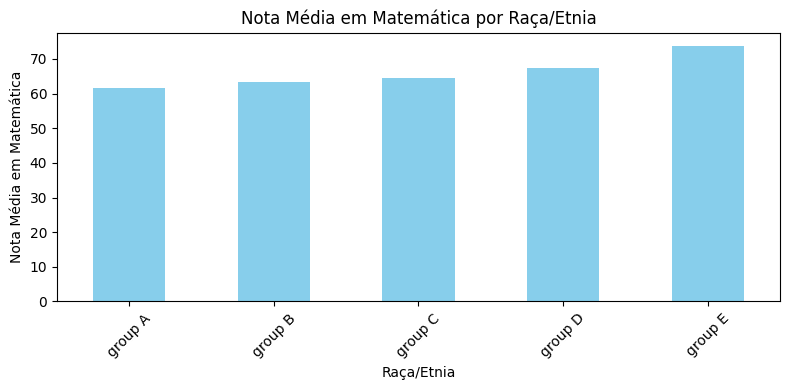

In [37]:
# Agrupando o banco de dados a partir da raça/etnia dos alunos;
agrupar_etnia = df.groupby('race/ethnicity')

# Plotando um gráfico com a nota média em Matemática para cada grupo disponível;
media_mat_por_etnia = agrupar_etnia['math score'].mean()
plt.figure(figsize=(8, 4))
media_mat_por_etnia.plot(kind='bar', color='skyblue')
plt.title('Nota Média em Matemática por Raça/Etnia')
plt.xlabel('Raça/Etnia')
plt.ylabel('Nota Média em Matemática')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



- Plotando o gráfico acima, percebemos que o grupo "E" é a etnia que tem a maior média em matemática dentre todos

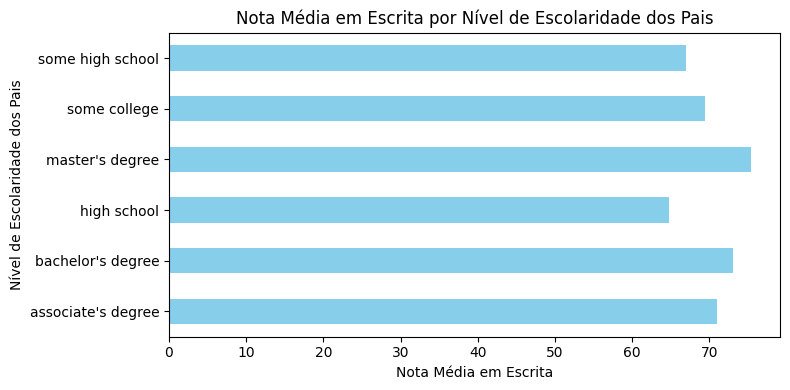

In [46]:
# Agrupando o banco de dados a partir do Nível de Escolaridade dos pais;
agrupar_nivel_escolaridade_pais = df.groupby('parental level of education')

# Plotando um gráfico com a nota média em Escrita para cada grupo disponível;
media_escrita_por_grupo = agrupar_nivel_escolaridade_pais['reading score'].mean()

plt.figure(figsize=(8, 4))
media_escrita_por_grupo.plot(kind='barh', color='skyblue')
plt.title('Nota Média em Escrita por Nível de Escolaridade dos Pais')
plt.xlabel('Nota Média em Escrita')
plt.ylabel('Nível de Escolaridade dos Pais')
plt.tight_layout()
plt.show()



- Aparentemente, filhos de pais com diploma de mestrado conseguem ter notas melhores na escola. Isso provavelmente se deve pelo fato de os pais conseguirem direcionar melhor os próprios filhos nos estudos, por terem experiência acadêmica.

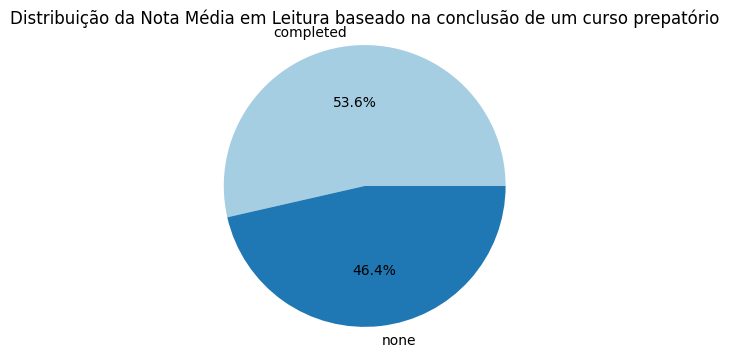

In [53]:
# Agrupando o banco de dados a partir da coluna que diz se um grupo étnico participou deum curso preparatório;
agrupando_por_curso_preparatório = df.groupby('test preparation course')

# Plotando um gráfico com a nota média em Leitura para cada grupo disponível;
media_leitura_por_grupo = agrupando_por_curso_preparatório['writing score'].mean()

plt.figure(figsize=(4, 4))

plt.pie(media_leitura_por_grupo,
        labels=media_leitura_por_grupo.index,
        autopct='%1.1f%%',
        colors=plt.cm.Paired.colors)

plt.title('Distribuição da Nota Média em Leitura baseado na conclusão de um curso prepatório')
plt.axis('equal')
plt.show()


- Nota-se pelo gráfico de pizza acima que os alunos que terminaram o curso preparatório para as provas fizeram pontuações maiores, independente de sua etnia. Isso se explica porquê realizaram o teste estando mais capacitados.